In [3]:
#imported packages
install.packages("ggplot2")
install.packages("dplyr")
install.packages("GGally")
install.packages("gridExtra")
install.packages("corrplot")
install.packages("car")
install.packages("olsrr")
install.packages("recipes")
install.packages("rsample")
install.packages("leaps")
install.packages("caret")
install.packages("summarytools")


Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//Rtmpe0N5MC/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//Rtmpe0N5MC/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//Rtmpe0N5MC/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//Rtmpe0N5MC/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//Rtmpe0N5MC/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//Rtmpe0N5MC/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//Rtmpe0N5MC/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//Rtmpe0N5MC/down

In [5]:
#library(summarytools)
library(leaps)
library(rsample)
library(recipes)
library(olsrr)
library(car)
library(corrplot)
library(gridExtra)
library(ggplot2)
library(dplyr)
library(GGally)
library(patchwork)

Lade n"otiges Paket: dplyr


Attache Paket: 'dplyr'


Die folgenden Objekte sind maskiert von 'package:stats':

    filter, lag


Die folgenden Objekte sind maskiert von 'package:base':

    intersect, setdiff, setequal, union



Attache Paket: 'recipes'


Das folgende Objekt ist maskiert 'package:stats':

    step



Attache Paket: 'olsrr'


Das folgende Objekt ist maskiert 'package:datasets':

    rivers


Lade n"otiges Paket: carData


Attache Paket: 'car'


Das folgende Objekt ist maskiert 'package:dplyr':

    recode


corrplot 0.95 loaded


Attache Paket: 'gridExtra'


Das folgende Objekt ist maskiert 'package:dplyr':

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [6]:
car_data <- read.csv("data/CarPrice.csv")
head(car_data)
colnames(car_data)


#dropped = car_ID symbolling Car
#car_data$curbweight
car_data$wheelbase




,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,...,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


[1] "car_ID"           "symboling"        "CarName"          "fueltype"        
 [5] "aspiration"       "doornumber"       "carbody"          "drivewheel"      
 [9] "enginelocation"   "wheelbase"        "carlength"        "carwidth"        
[13] "carheight"        "curbweight"       "enginetype"       "cylindernumber"  
[17] "enginesize"       "fuelsystem"       "boreratio"        "stroke"          
[21] "compressionratio" "horsepower"       "peakrpm"          "citympg"         
[25] "highwaympg"       "price"

[1]  88.6  88.6  94.5  99.8  99.4  99.8 105.8 105.8 105.8  99.5 101.2 101.2
 [13] 101.2 101.2 103.5 103.5 103.5 110.0  88.4  94.5  94.5  93.7  93.7  93.7
 [25]  93.7  93.7  93.7  93.7 103.3  95.9  86.6  86.6  93.7  93.7  93.7  96.5
 [37]  96.5  96.5  96.5  96.5  96.5  96.5  96.5  94.3  94.5  94.5  96.0 113.0
 [49] 113.0 102.0  93.1  93.1  93.1  93.1  93.1  95.3  95.3  95.3  95.3  98.8
 [61]  98.8  98.8  98.8  98.8  98.8 104.9 104.9 110.0 110.0 106.7 115.6 115.6
 [73]  96.6 120.9 112.0 102.7  93.7  93.7  93.7  93.0  96.3  96.3  95.9  95.9
 [85]  95.9  96.3  96.3  96.3  96.3  94.5  94.5  94.5  94.5  94.5  94.5  94.5
 [97]  94.5  94.5  95.1  97.2  97.2 100.4 100.4 100.4  91.3  91.3  99.2 107.9
[109] 107.9 114.2 114.2 107.9 107.9 114.2 114.2 107.9 107.9 108.0  93.7  93.7
[121]  93.7  93.7  93.7 103.3  95.9  94.5  89.5  89.5  89.5  98.4  96.1  96.1
[133]  99.1  99.1  99.1  99.1  99.1  99.1  93.7  93.7  93.3  97.2  97.2  97.2
[145]  97.0  97.0  97.0  97.0  96.9  96.9  95.7  95.7  95.7  95.7  95.7  95.7
[157]  95.7  95.7  95.7  95.7  95.7  95.7  95.7  94.5  94.5  94.5  94.5  98.4
[169]  98.4  98.4  98.4  98.4  98.4 102.4 102.4 102.4 102.4 102.4 102.9 102.9
[181] 104.5 104.5  97.3  97.3  97.3  97.3  97.3  97.3  97.3  94.5  94.5 100.4
[193] 100.4 100.4 104.3 104.3 104.3 104.3 104.3 104.3 109.1 109.1 109.1 109.1
[205] 109.1

The dataset includes 205 rows and 26 columns. It has no missing values and no duplicate values, ensuring data quality for machine learning purposes.
The dataset originally contains 25 covariates, but some of them are redundant or challenging to interpret. For example, features like car
width, car height, car length, and car weight all
represent similar car's attributes. To reduce redundancy, we decided to
keep one of these attributes that best represents the car's size. Additionally, features such as car_ID and symboling are
difficult to interpret and do not appear to provide meaningful
information about the car's characteristics. These features were deemed irrelevant to our analysis, so we drop these features. After filtering, the dataset now contains 14 relevant features(includes
output), improving both interpretability and focus for analysis.



* The dataset was published in 2019. The exact timeframe of data collection is not specified. 
* All features are measured in U.S. customary units, and all data points are from vehicles in the U.S.


| Variable  | Type               | Description                                   | Unit          
|-----------|--------------------|-----------------------------------------------|---------------|
| car_ID | Categorical | the unique ID for the cars in the dataset | Unitless |
| symboling | Categorical | the symbol for each car corresponds to the levels of the feature 'carbody' | Unitless
| Carname | Categorical | the name of the car | Unitless | 
| fueltype  | Binary Categorical | The type of fuel the car uses: "gas" or "diesel" | Unitless |
| aspiration  | Categorical | the type of aspiration used in the car's engine | Unitless
| doornumber  | Categorical | the number of doors on the car | Unitless |
| carbody | Categorical | The five different car category such as 'sedan','wagon' | Unitless |
| drivewheel  | Cateogrical | the drive wheel type of car | Unitless
| enginelocation | Categorical | the location of the engine in the car |Unitless
| carlength | Numerical | the length of the car | inch |
|carwidth | Numerical | the width of the car | inch |
|carheight | Numerical | the height of the car | inch |
| curbweight | Numerical | total weight of the vehicle without passengers or cargo but includes all necessary operating fluids | lbs|
| enginetype | Categorical|  type of engine used in the vehicles | Unitless
| cylindernumber | Categorical | the number of cylinders in the car's engine |Unitless
 enginesize | Numerical | the size of the engine |  cubic inches |
 |fuelsystem | Categorical | fuel delivery system of the car | Unitless|
 |boreratio| Numerical |The ratio of the cylinder's bore to its stroke, affecting the engine's efficiency and power output | Unitless|
 |stroke| Numerical | The distance the piston travels inside the cylinder, impacting engine displacement and performance | inch |
 |compressionratio | Numerical |The ratio of the cylinder's maximum to minimum volume, influencing engine efficiency and power generation | Unitless |
| horsepower | Numerical | the power of the engine |  hp |
| peakrpm | Numerical | the engine's maximum revolution per minute at the peak power | peak revolutions per minute |
| citympg | Numerical | the fuel efficiency in miles per gallon driving in city| miles per gallo |
| highwaympg | Numerical | the fuel efficiency in miles per gallon driving in the highway| miles per gallo |
|price | Numerical | the price of the car | US dollar |

In [7]:
selected_columns <- c("fueltype", "aspiration", "doornumber","drivewheel", 
                       "carlength", "enginesize",
                    "horsepower", "peakrpm", "citympg", "price", "enginelocation", "cylindernumber")
car_data <- car_data[selected_columns]
head(car_data)

,fueltype,aspiration,doornumber,drivewheel,carlength,enginesize,horsepower,peakrpm,citympg,price,enginelocation,cylindernumber
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>
1,gas,std,two,rwd,168.8,130,111,5000,21,13495,front,four
2,gas,std,two,rwd,168.8,130,111,5000,21,16500,front,four
3,gas,std,two,rwd,171.2,152,154,5000,19,16500,front,six
4,gas,std,four,fwd,176.6,109,102,5500,24,13950,front,four
5,gas,std,four,4wd,176.6,136,115,5500,18,17450,front,five
6,gas,std,two,fwd,177.3,136,110,5500,19,15250,front,five


In [34]:
# Install and load the package

# Get the summary
summary_df <- describe(car_data)

# Load knitr for table formatting
library(knitr)

# Create a Markdown table
kable(summary_df, format = "markdown", caption = "Summary of car_data")




Table: Summary of car_data

|                | vars|   n|         mean|           sd|  median|      trimmed|        mad|    min|     max| range|       skew|   kurtosis|          se|
|:---------------|----:|---:|------------:|------------:|-------:|------------:|----------:|------:|-------:|-----:|----------:|----------:|-----------:|
|fueltype*       |    1| 205|     1.902439|    0.2974465|     2.0|     2.000000|    0.00000|    1.0|     2.0|     1| -2.6927593|  5.2767645|   0.0207746|
|aspiration*     |    2| 205|     1.180488|    0.3855347|     1.0|     1.103030|    0.00000|    1.0|     2.0|     1|  1.6494162|  0.7241776|   0.0269269|
|doornumber*     |    3| 205|     1.439024|    0.4974829|     1.0|     1.424242|    0.00000|    1.0|     2.0|     1|  0.2439407| -1.9499335|   0.0347457|
|drivewheel*     |    4| 205|     2.326829|    0.5561706|     2.0|     2.339394|    0.00000|    1.0|     3.0|     2| -0.0575011| -0.7124775|   0.0388446|
|carlength       |    5| 205|   174.049268|   


# Data Visualization:

In [8]:
missing_value <- sum(is.na(car_data))
missing_value

[1] 0

It is a decent dataset that doesn't have any missing value.

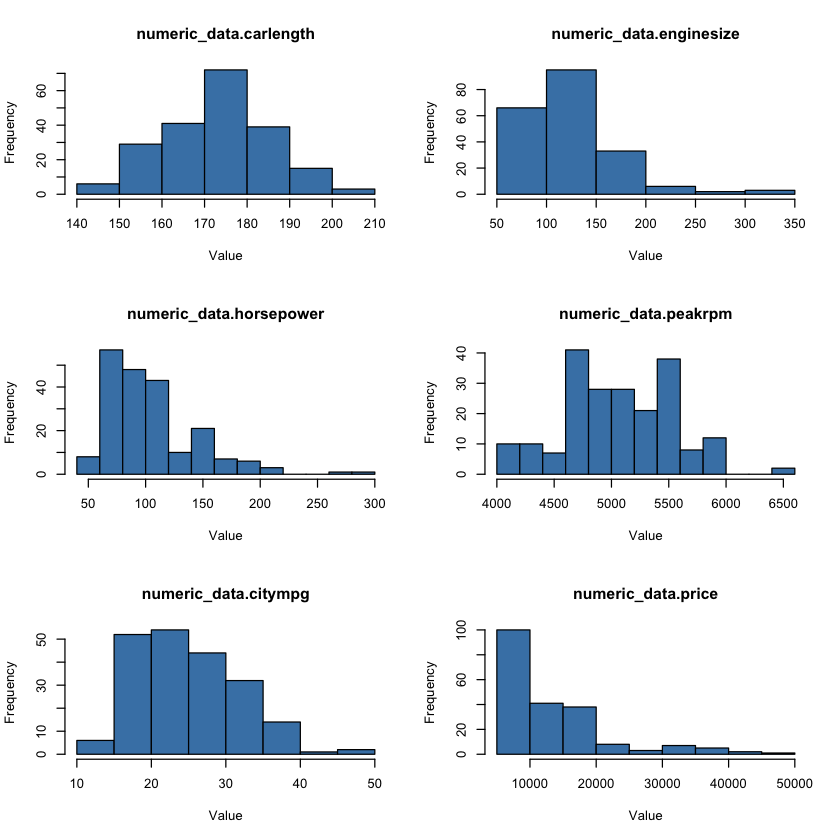

In [9]:
numeric_data <- car_data %>% select_if(is.numeric)
par(mfrow = c(3, 2))
car_data_n <- data.frame(
  numeric_data$carlength,
  numeric_data$enginesize,
  numeric_data$horsepower,
  numeric_data$peakrpm,
  numeric_data$citympg,
  numeric_data$price
)
for (i in 1:ncol(car_data_n)) {
  hist(car_data_n[[i]], main = colnames(car_data_n)[i], xlab = "Value", col = "steelblue", border = "black")
}



1) The distributions of horsepower and engine size are right-skewed, which may violate the assumption of the linear model assumptions, such as linearity and homoscedasticity, and might potentially affect the model’s performance. To address this, we will log transform these two features to reduce skewness.

2) The response variable price is also skewed, however, we don't usually change the output if the linear model assumptions are all met, so we will keep it unchanged by now. 

In [10]:
car_data$horsepower <- log(car_data$horsepower)
car_data$enginesize <- log(car_data$enginesize)

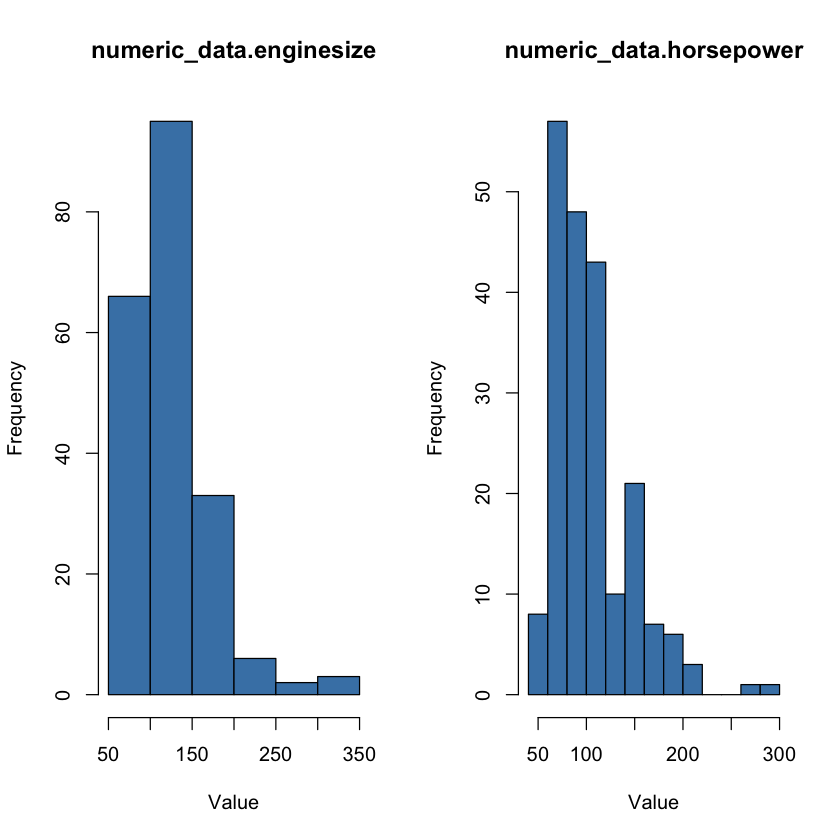

In [11]:
par(mfrow = c(1, 2))
car_data_n <- data.frame(
  numeric_data$enginesize,
  numeric_data$horsepower
)
for (i in 1:ncol(car_data_n)) {
  hist(car_data_n[[i]], main = colnames(car_data_n)[i], xlab = "Value", col = "steelblue", border = "black")
}

Now, the distributions for these features look better.

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
i Please use tidy evaluation idioms with `aes()`.
i See also `vignette("ggplot2-in-packages")` for more information."


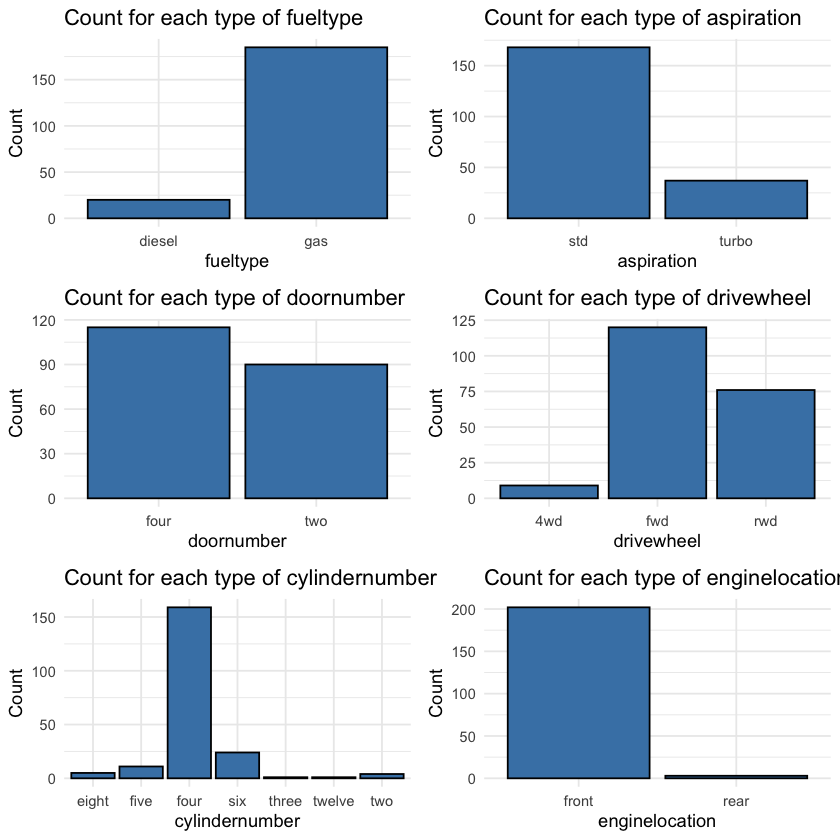

In [12]:
plots <- list()
categorical_columns <- c('fueltype','aspiration','doornumber','drivewheel', "cylindernumber", "enginelocation")

for (cat_col in categorical_columns) {
  p <- ggplot(car_data, aes_string(x = cat_col)) +
    geom_bar(fill = "steelblue", color = "black") +
    labs(title = paste("Count for each type of", cat_col), x = cat_col, y = "Count") +
    theme_minimal()
  
  plots[[cat_col]] <- p 
}

grid.arrange(grobs = plots, ncol = 2)

We notice that there are several class imbalance cases. 
1) Fueltype(class imbalance):
* Categories: "diesel" and "gas."
* Most vehicles use gas; significantly fewer using diesel.
2) Aspiration(class imbalance):
* Categories: "std" and "turbo."
* Most vehicles have "std" aspiration; fewer having "turbo" aspiration.
3) Doornumber:

* Categories: "four" and "two."

4) Drivewheel(class imbalance):

* Categories: "4wd," "fwd," and "rwd."
* "fwd" (front-wheel drive) is the most common, followed by "rwd" (rear-wheel drive). "4wd" (four-wheel drive) is the least common.
5) Enginelocation(class imbalance):

* Categories: "front" and "rear."
* Nearly all vehicles have their engines located in the front; very few having engines in the rear.
6) Cylindernumber(class imbalance):

* Categories: "two," "three," "four," "five," "six," "eight," and "twelve."
* The most common category is "four" cylinders, followed by "six." Other configurations, such as "three," "five," "two," "eight," and "twelve," are relatively rare.


By analyzing the above class imbalance plot, the three features below have highly imbalanced class distributions. Such imbalance can negatively effect the model's general performance, as the model may overfit to the majority classes while underfitting the minority classes. To avoid potential problem, we have decided to **exclude** these features.
##### 1) Drivewheel
##### 2) Engine location
##### 3) Cylinder number




In [13]:
#Excluse those imbalanced features
car_data <- car_data %>% select(- "cylindernumber", -"enginelocation", - "drivewheel")

# Investigate Multicollinearity:

In [14]:
numeric_data <- car_data %>% select_if(is.numeric)
car_data_new <- car_data %>% 
  mutate_at(c("fueltype", "aspiration", "doornumber"), 
            as.factor)
install.packages("corrplot")
library(corrplot)
library(RColorBrewer)


Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//Rtmpe0N5MC/downloaded_packages


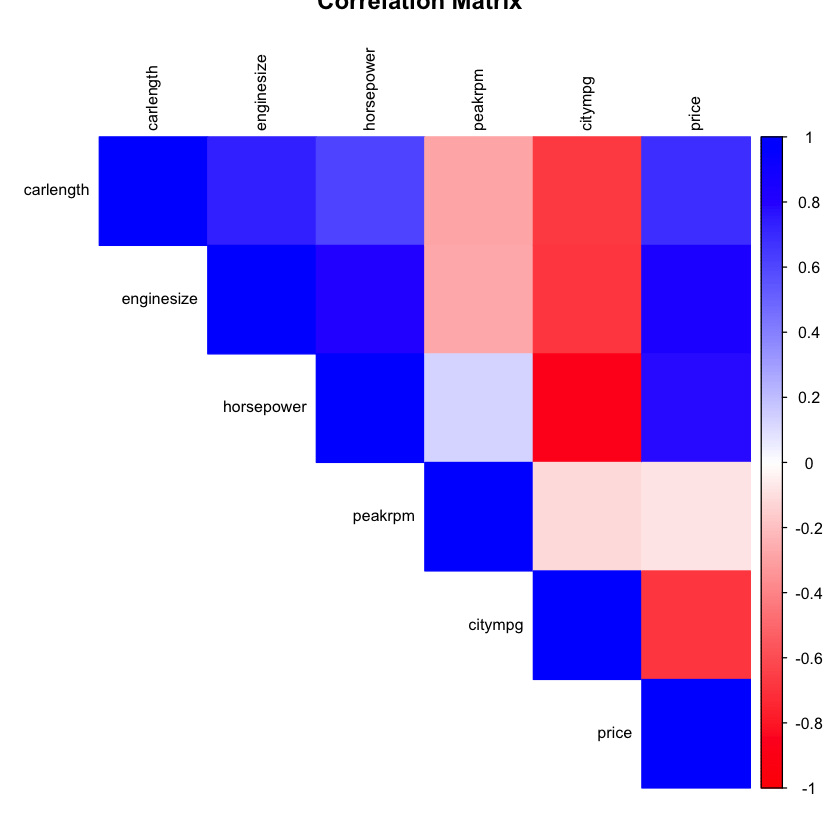

In [16]:

cor_matrix <- cor(numeric_data, use = "complete.obs")
corrplot(cor_matrix,
    method = "color",
    type = "upper",
    tl.col = "black",
    tl.cex = 0.8,
    col = colorRampPalette(c("red", "white", "blue"))(200),
    title = "Correlation Matrix"
)


 From the correlation matrix, **horsepower** and **enginesize** are highly correlated, whcih makes sense with our intuition where the bigger enginesize usually represents the higher horsepower because they can burn more fuel and generate more power, just like "Height" and "Weight" of a child are highly correlated.

To further investigate, we compute VIF for each feature. 

In [17]:
vif_model <- lm(price ~ ., data = numeric_data)
vif_vals <- vif(vif_model)
vif_df <- data.frame(
  VIF = vif_vals
)
vif_df


,VIF
,<dbl>
carlength,2.816327
enginesize,6.116893
horsepower,9.214057
peakrpm,1.902109
citympg,5.237289


It seems that the VIFs for horsepower is near to 10 (>= 10 indicates severe multicollinearity ).

So based on the above analysis, it seems to be reasonable to drop this features to reduce the risk of causing multicollinearity in our fitted model.

In [18]:
car_data_new <- car_data_new %>% select(-horsepower)

# Perform Best Subset Selection:

##### why best subset selection?
* Unlike forward/backward selection which relies on sequatial inclusion of the covariates, best subset selection evaluates all possible combinations of the covariates. This ensures that the final model is robust and not influenced by the order in which the covariates are added.  

To address post-inference bias, we split the dataset into two subsets: a selection set and a modeling set. The best subset selection process is performed on the selection set to determine the optimal group of variables. This separation ensures that the modeling set remains independent for model evaluation.

In [19]:
#This is the desired seed finder:
for (seed in 27:1000) {
    set.seed(seed)

    # Split the data
    car_split <- initial_split(car_data_new, prop = 0.7, strata = price)
    car_selection <- training(car_split)
    car_model <- testing(car_split)

    # Perform exhaustive regression subset selection
    s <- regsubsets(price ~ ., data = car_selection, method = "exhaustive", nvmax = 10)
    ss <- summary(s)

    summary_df_select <- data.frame(
        n_coefficients = 2:8,
        n_covariates = 1:7,
        RSQ = ss$rsq,
        ADJ.R2 = ss$adjr2,
        RSS = ss$rss
    )
    full_model <- lm(price ~ ., data = car_selection)
    full_rss <- sum(residuals(full_model)^2)
    rss <- summary_df_select$RSS
    n <- nrow(car_selection)
    sigma2 <- full_rss / (n - 8)
    Cp <- (rss / sigma2) - (n - 2 * (2:8))
    summary_df_select$Cp <- Cp

    # Exclude the last row
    summary_df_excluded <- head(summary_df_select, -1)


    adj_r2_max_idx <- which.max(summary_df_excluded$ADJ.R2) # Index of max Adjusted R^2
    closest_cp_idx <- which.min(abs(summary_df_excluded$Cp - (summary_df_excluded$n_covariates + 1))) # Closest Cp

    if (adj_r2_max_idx == 4 && closest_cp_idx == 6) {
        print(paste("Desired seed:", seed))
        break
    }
}


[1] "Desired seed: 29"


In [20]:
set.seed(29)
car_split <- initial_split(car_data_new, prop = 0.7, strata = price)
car_selection <- training(car_split)
car_model <- testing(car_split)

#### Fit the Model and check the performance

In [21]:
s = regsubsets(price ~., data=car_selection, method="exhaustive", nvmax = 10)
ss = summary(s)
summary_df_select <- data.frame(
  n_coefficients = 2:8,
  n_covariates = 1:7,       
  RSQ = ss$rsq,   
  ADJ.R2 = ss$adjr2,
  RSS = ss$rss )

In [34]:
full_model <- lm(price ~ ., data = car_selection)
full_rss  <- sum(residuals(full_model)^2)
rss <- summary_df_select$RSS
n <- nrow(car_selection)
sigma2 <- full_rss/ (n - 8)
Cp <- (rss / sigma2) - (n - 2 * (2:8))
summary_df_select$Cp <- Cp
summary_df_select

ss

n_coefficients,n_covariates,RSQ,ADJ.R2,RSS,Cp
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,0.7358856,0.7339855,2226803882,18.490531
3,2,0.7538278,0.7502601,2075528992,9.927493
4,3,0.7651151,0.7599716,1980363614,5.282402
5,4,0.7738813,0.7672308,1906453726,2.121513
6,5,0.7740022,0.7656319,1905434972,4.050377
7,6,0.7740588,0.7639421,1904957030,6.017004
8,7,0.7740877,0.7621976,1904713518,8.000000


Subset selection object
Call: regsubsets.formula(price ~ ., data = car_selection, method = "exhaustive", 
    nvmax = 10)
7 Variables  (and intercept)
                Forced in Forced out
fueltypegas         FALSE      FALSE
aspirationturbo     FALSE      FALSE
doornumbertwo       FALSE      FALSE
carlength           FALSE      FALSE
enginesize          FALSE      FALSE
peakrpm             FALSE      FALSE
citympg             FALSE      FALSE
1 subsets of each size up to 7
Selection Algorithm: exhaustive
         fueltypegas aspirationturbo doornumbertwo carlength enginesize peakrpm
1  ( 1 ) " "         " "             " "           " "       "*"        " "    
2  ( 1 ) " "         " "             " "           " "       "*"        "*"    
3  ( 1 ) "*"         " "             " "           " "       "*"        "*"    
4  ( 1 ) "*"         " "             " "           " "       "*"        "*"    
5  ( 1 ) "*"         " "             " "           "*"       "*"        "*"    
6  ( 1 ) "

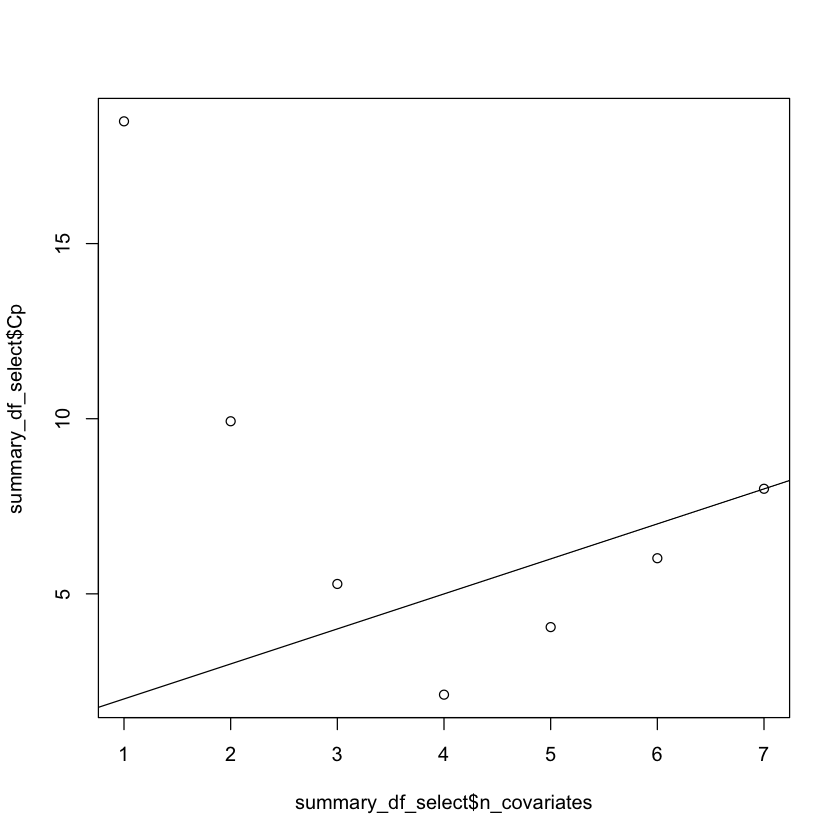

In [23]:
plot(summary_df_select$n_covariates, summary_df_select$Cp)
abline(a = 1, b = 1)

* Model with 4 covariates has the highest adjusted R^2, let's call it **Model 4**
* Model with 6 covariates has the suitable Cp that is closest to number of (covariates+1), let's call it **Model 6**

We will select the features identified in these two models and fit two multiple linear regression models—one with the three features from Model 4 and another with the four features from Model 5—using the modeling set (test split). 

In [35]:
library(caret)
car_lm4 <- lm(price ~ fueltype  + enginesize + citympg + peakrpm , data = car_model)
car_lm6 <- lm(price ~ fueltype  + aspiration + enginesize + peakrpm + citympg + doornumber , data = car_model)
#summary(car_lmone)
#summary(car_lmtwo)

In [36]:
residuals4 <- car_lm4$residuals
rmse4 <- sqrt(mean(residuals4^2))
residuals6 <- car_lm6$residuals
rmse6<- sqrt(mean(residuals6^2))

table <- data.frame(model= c(4,6), RMSE = c(rmse4, rmse6), 
adjR2 = c(summary(car_lm4)$adj.r.squared, summary(car_lm6)$adj.r.squared))
table

model,RMSE,adjR2
<dbl>,<dbl>,<dbl>
4,4044.160,0.7539143
6,3962.629,0.7554466


From the table, we can see that model with 6 covariates (**Model 6**) provides the smallest RMSE and the highest adjR^2 compared to **Model 4**, so we will choose it as our final model.

# Check Model Assumption:

### 1. Check constant variance assumption

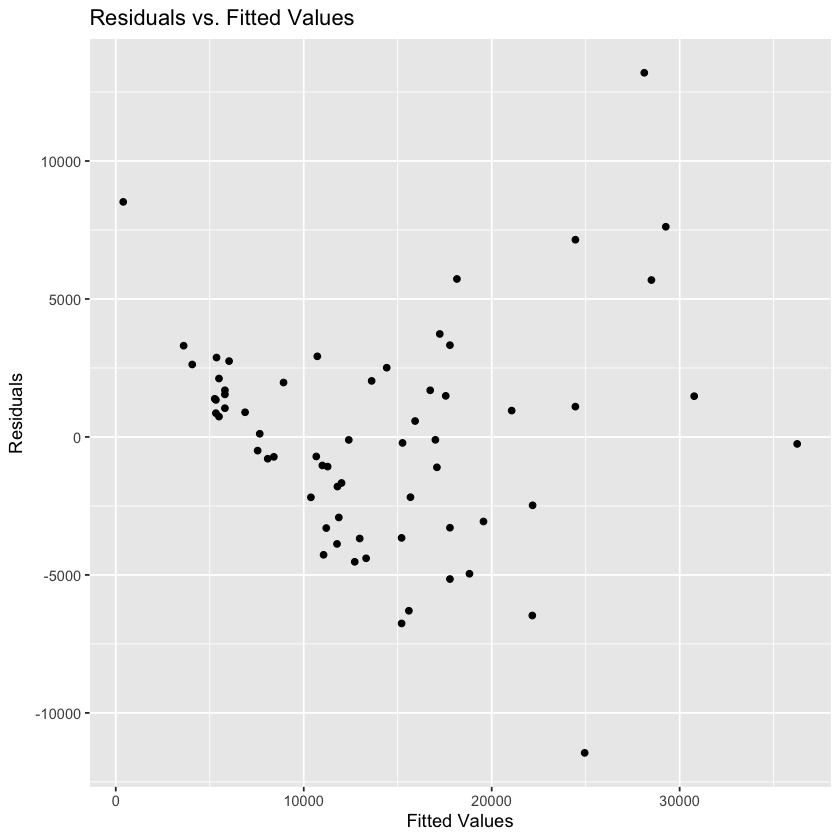

In [37]:
residuals_data <- data.frame(
  Fitted = fitted(car_lm6),
  Residuals = residuals(car_lm6) 
)
ggplot(residuals_data, aes(x = Fitted, y = Residuals)) +
  geom_point() +  
  xlab("Fitted Values") +
  ylab("Residuals") +
  ggtitle("Residuals vs. Fitted Values")


In [38]:
install.packages("huxtable")
install.packages("modelsummary")
install.packages("jtools")
install.packages("stargazer")






Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//Rtmpe0N5MC/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//Rtmpe0N5MC/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//Rtmpe0N5MC/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//Rtmpe0N5MC/downloaded_packages


In [28]:
install.packages("sjPlot")
install.packages("gt")




Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//Rtmpe0N5MC/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/3d/kg4tshsj6f596wfplb8hzsgw0000gn/T//Rtmpe0N5MC/downloaded_packages


The residual plot indicates a violation of the assumption of constant variance (heteroscedasticity), as the variance of residuals appears to increase with the fitted values. To address this, we will transform the output y.

In [41]:
#head(car_model)

library(broom)
library(jtools)
library(stargazer)
library(sjPlot)
library(broom)

final_car_lm <- lm(log(price) ~ fueltype  + aspiration + enginesize + peakrpm + citympg + doornumber +  + I(citympg^2) , data = car_model)
summary(final_car_lm)

#inal_car_lm2 <- lm(log(price) ~ fueltype + enginesize + peakrpm + citympg + carlength, data = car_model)
#summary(final_car_lm2)

summ(final_car_lm)




Call:
lm(formula = log(price) ~ fueltype + aspiration + enginesize + 
    peakrpm + citympg + doornumber + +I(citympg^2), data = car_model)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5844 -0.1209 -0.0021  0.1221  0.4007 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      8.992e+00  1.399e+00   6.429 3.02e-08 ***
fueltypegas     -4.170e-01  1.226e-01  -3.402 0.001241 ** 
aspirationturbo -2.633e-02  7.987e-02  -0.330 0.742918    
enginesize       6.259e-01  1.620e-01   3.863 0.000293 ***
peakrpm          8.432e-05  7.333e-05   1.150 0.255060    
citympg         -1.657e-01  4.049e-02  -4.094 0.000138 ***
doornumbertwo   -6.543e-02  5.671e-02  -1.154 0.253444    
I(citympg^2)     2.233e-03  7.732e-04   2.888 0.005505 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2109 on 56 degrees of freedom
Multiple R-squared:  0.8508,	Adjusted R-squared:  0.8321 
F-statistic: 45.61 on 7 and 56 DF,  

MODEL INFO:
Observations: 64
Dependent Variable: log(price)
Type: OLS linear regression 

MODEL FIT:
F(7,56) = 45.61, p = 0.00
R<U+00B2> = 0.85
Adj. R<U+00B2> = 0.83 

Standard errors:OLS
----------------------------------------------------
                         Est.   S.E.   t val.      p
--------------------- ------- ------ -------- ------
(Intercept)              8.99   1.40     6.43   0.00
fueltypegas             -0.42   0.12    -3.40   0.00
aspirationturbo         -0.03   0.08    -0.33   0.74
enginesize               0.63   0.16     3.86   0.00
peakrpm                  0.00   0.00     1.15   0.26
citympg                 -0.17   0.04    -4.09   0.00
doornumbertwo           -0.07   0.06    -1.15   0.25
I(citympg^2)             0.00   0.00     2.89   0.01
----------------------------------------------------

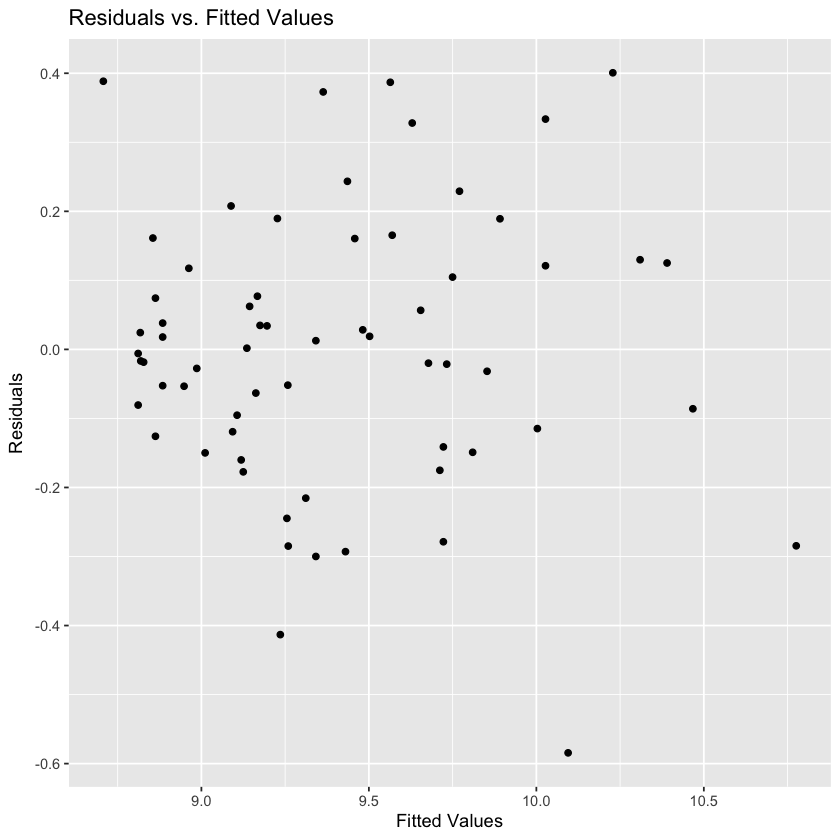

In [42]:
residuals_data <- data.frame(
  Fitted = fitted(final_car_lm),
  Residuals = residuals(final_car_lm)  
)
ggplot(residuals_data, aes(x = Fitted, y = Residuals)) +
  geom_point() +  
  xlab("Fitted Values") +
  ylab("Residuals") +
  ggtitle("Residuals vs. Fitted Values")


Now, the residual plot looks better and meets constant variance assumption.

### 2. Check Normality

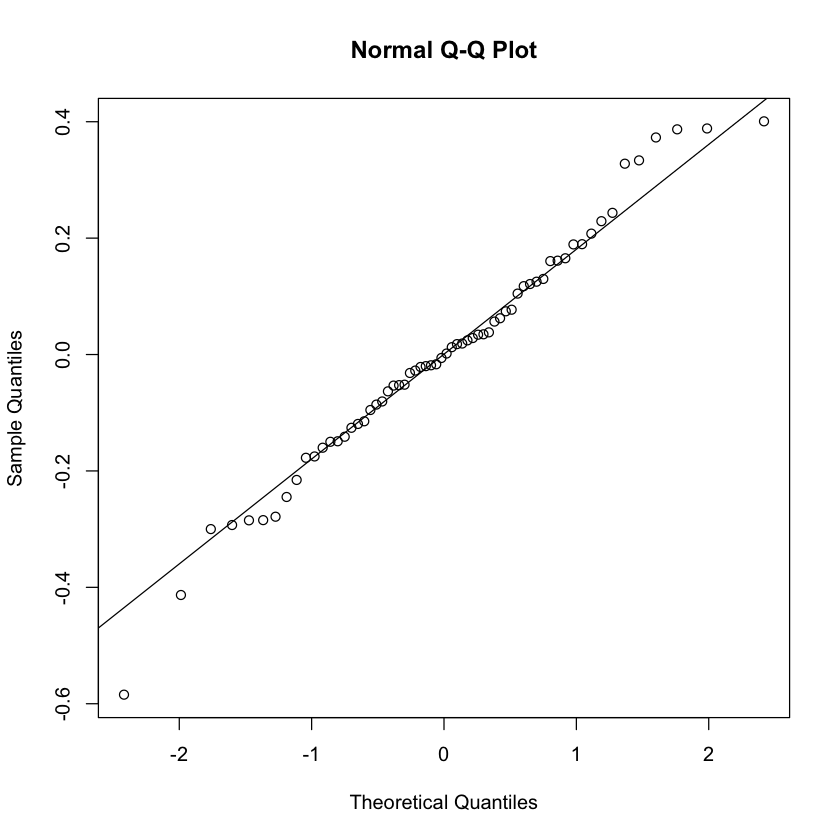

In [43]:
qqnorm(residuals_data$Residuals)
qqline(residuals_data$Residuals)

The residuals are approximately normal but there are slight deviations, which suggest a heavy-tailed distribution. However, majority of the residuals closely follow the diagonal line, and also noted that we are using the test split here where it's only 30% of the original data. So this issue might be alleviated when we have more data points. 


### 3. Check Independence

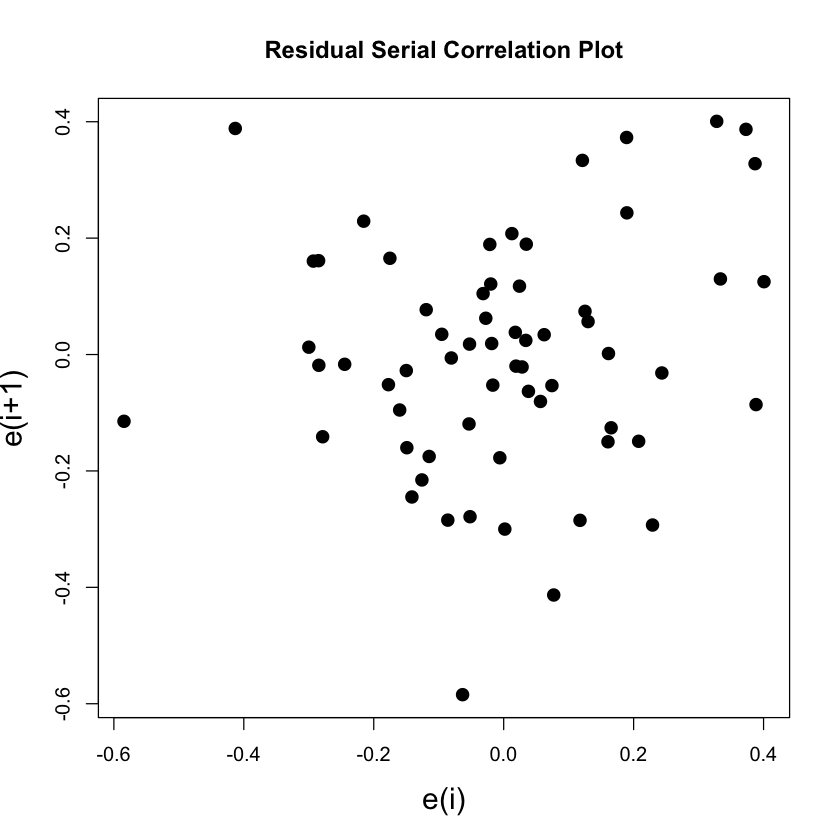

In [44]:
plot(
  head(residuals_data$Residuals, -1), 
  tail(residuals_data$Residuals, -1),  
  xlab = "e(i)", 
  ylab = "e(i+1)", 
  cex = 1.5, 
  cex.lab = 1.5, 
  pch = 16,
  main = "Residual Serial Correlation Plot"
)


The serial correlation suggests that the sequential residual ei+1 against ei show no obvious patterns, indicating that the residuals are independent of one another. 

# Conclusion:
Based on the final multiple linear regression model, the key findings are as follows:

| Variable  | P-value               | Signicant or not   (0.1)                               |          
|-----------|--------------------|-----------------------------------------------|
| fueltypegas | 0.003414| Yes |
| aspirationturbo | 0.814146 | No |
| enginesize | 4.09e-06 | Yes |
| peakrpm | 0.514453 | No |
| citympg | 1.78e-07 | Yes |
| carlength | 0.004798 | Yes |
| (citympg)^2 | 0.004009 | Yes |

***Note***: Logging the output in a regression model will not change the direction of the association between the original output and the input variables. However, it can change the interpretation of the coefficients.

Interpretation for significant variables:
* Fuel Type: the negative coefficient for dummy variable fueltypegas implies that gas cars are valued less than diesel cars, indicating that the price for diesel cars can be set higher.

* Enginesize: the positive coefficient for enginesize points out that larger engines command higher prices, which suggests that Geely Auto can offer models with larger engine options and with higher prices.

* citympg: the negative coefficient represents the fuel efficiency in miles per gallon driving in city| miles per gallo, whcih makes sense since imagine the travelling distance between a 1 million dollars car and a 10000 dollars car, the old car usually have a higher fuel efficiency but travels slower compared to the expensive cars.

* carlength: the negative coefficient for the length of the car, meaning that keeping other predictors' constant, for one unit increase in the car length, the estimated natural log price of the car is decreased by 1.290e-01. This also fits the intuition since the shorter car, racing cars, the more expensive on the price. 

* citympg and citympg^2: with the existance of the quatratic term, it is hard to say how the citympg is associated with pric. Because the coefficent for citympg is negative, whereas the coefficient for citympg^2 is positive and suggests a nuanced relationship. High or low values of citympg may lead to different pricing trends.

Model Performance:

The model explains a substantial portion of variance in car prices, with an adjusted R^2 of 0.7183327, which is a decent model performance.

Strategies for Geely Auto:

1) Diversify into Diesel-Powered Cars

Geely Auto can explore the U.S. market for diesel-powered vehicles, as the analysis suggests that diesel cars command higher prices. This strategy could appeal customers who value fuel efficiency with diesel engines.

2) Design Engines for different targeting Customer Segments

Offer cars with a variety of engine sizes to target different customer groups. Larger engines can appeal to customers seeking higher performance, especially for cars of similar size, giving Geely Auto a competitive attribute in the U.S. market.

In [210]:
summary(final_car_lm)
unique(car_data$fueltype)



Call:
lm(formula = log(price) ~ fueltype + aspiration + enginesize + 
    peakrpm + citympg + carlength, data = car_model)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46686 -0.08117 -0.00063  0.09781  0.65392 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.290e+00  1.246e+00   4.246 8.11e-05 ***
fueltypegas     -3.307e-01  1.327e-01  -2.492  0.01562 *  
aspirationturbo -4.852e-02  7.903e-02  -0.614  0.54168    
enginesize       5.802e-01  1.693e-01   3.428  0.00114 ** 
peakrpm          1.341e-04  6.992e-05   1.918  0.06011 .  
citympg         -4.150e-02  8.919e-03  -4.653 1.99e-05 ***
carlength        1.106e-02  4.021e-03   2.752  0.00794 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.211 on 57 degrees of freedom
Multiple R-squared:  0.8479,	Adjusted R-squared:  0.8319 
F-statistic: 52.97 on 6 and 57 DF,  p-value: < 2.2e-16


[1] "gas"    "diesel"

Caveats:

1. No Interaction Terms Considered

The current model doesn't consider for potential interactions between features. For example, there might be interaction between enginesize and aspiration that could influence price. Including interaction terms could provide deeper insights into how feature combinations impact pricing and improve the model performance.

2. Limitations of Linear Models

If we are aiming for prediction, linear model might not be enough. The linear model might not fully capture complexity and non-linear relationships between features and car prices. Exploring more complex models, such as decision trees, random forests, and kNN regression could improve predictive performance on real world data.

3. Simple Metric

For predictive purposes, relying on traditional metrics like adjusted R^2 might not be sufficient. Depending on the specific marketing target, different metrics should be considered. For example, RMSE and MAE, which are better for measuring model accuracy. Additionally, it will be good to implement cross-validation ensures robust evaluation of the model’s performance and reduces the risk of overfitting/underfitting to specific data subsets.

4. Lack of Feature transformation and enigeering 

To better understand how the varaible impacts the car price, applying feature transformation is essential, such as, standardizing the numercial feature. In this way, the linear model's coefficients could be interpretable, and they will be on a comparable scale.

5. Small dataset

Splitting the dataset into selection and modeling sets reduces the number of data points available for fitting models. The smaller datasets may lead to overfitting to unseen data. Addressing this problem may need to leverage cross-validation or enlarge our dataset to improve model robustness.